In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
from source.tserie import TSerie
from source.read_ontario import read_ontario
from source.read_india import read_india
from source.read_brasil import read_brasil
from source.read_hongkong import read_hongkong
from source.app_dataset import OntarioDataset, BrasilDataset, HongKongDataset
from source.utils import commonWindows
# from ccpca import CCPCA

import sys

sys.path.append('/home/texs/Documentos/Repositories/ts2vec')
# from cuml.manifold import UMAP

N_VIZ_SAMPLES = 600
VIS_PATH = 'visualizations'
SMOOTH = 8 # 8 -1 if you don't want to smooth the data otherwise the size of the smooth window
MODE = 'shape' # subsequences - shape
EPOCHS = 40
POLLUTANTS = ['CO', 'NO2'] # ['NO', 'NOx', 'NO2', 'SO2', 'CO', 'O3', 'PM25']
UMAP_NEIGHBORS = 15

# Months case

In [2]:
granularity = 'years'
# dataset = HongKongDataset(granularity=granularity)
# dataset = OntarioDataset(granularity=granularity)
# windows_map = read_brasil(granularity='years', cache=True)
# windows_map = read_ontario(granularity=granularity,                   cache=True)

windows_map = read (granularity='years', cache=True, max_missing=0.1)

pollutans = POLLUTANTS
# windows, dates, station_ids, stations = commonWindows(windows_map, pollutans)

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


KeyboardInterrupt: 

In [3]:
# print(dataset.stations)
windows, dates, station_ids, stations = commonWindows(windows_map, pollutans, dataset.stations)
# windows, dates, station_ids, stations = dataset.common_windows('NO2', dataset.stations)
print(windows.shape)

(168, 365, 2)


In [4]:
mts = TSerie(X=windows, y = station_ids)

# if SMOOTH > 0:
#     mts.smooth(window_size=SMOOTH)

# if MODE == 'shape':
#     mts.shapeNormalizization()
# else:
mts.minMaxNormalizization()


Loaded mts - N: 168, T: 365, D: 2 
(168, 2, 365)


([-1.3865345263217526, -11.05210328437905], [39.63333333333333, 287.625])

In [5]:
from source.featlearn.autoencoder_lr import AutoencoderFL
from source.featlearn.mec_framework import MEC_FL

FEATURE_SIZE_CAE = 8
        
# X_train, X_val = train_test_split(mts.X.transpose([0, 2, 1]))

# net = AutoencoderFL(mts.D, mts.T, feature_size=FEATURE_SIZE_CAE)
# net.fit(mts.X, epochs=1000, batch_size=200,)
# _, features = net.encode(mts.X)

net = MEC_FL(windows.shape[2], windows.shape[1], feature_size=FEATURE_SIZE_CAE)
net.fit(windows.transpose(0,2,1), epochs=1000, batch_size=100, freq = 10)
features = net.encode(windows.transpose(0,2,1))


/home/texs/anaconda3/envs/clearn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch[1] Train loss    avg: -0.02438986301422119
Epoch[10] Train loss    avg: -0.6379038393497467
Epoch[20] Train loss    avg: -0.7125816941261292
Epoch[30] Train loss    avg: -0.7543112933635712
Epoch[40] Train loss    avg: -0.7750791609287262
Epoch[50] Train loss    avg: -0.7975821495056152
Epoch[60] Train loss    avg: -0.8030066192150116
Epoch[70] Train loss    avg: -0.80712029337883
Epoch[80] Train loss    avg: -0.8115295469760895
Epoch[90] Train loss    avg: -0.8176915943622589
Epoch[100] Train loss    avg: -0.8204444944858551
Epoch[110] Train loss    avg: -0.8200401961803436
Epoch[120] Train loss    avg: -0.8228688836097717
Epoch[130] Train loss    avg: -0.8235245645046234
Epoch[140] Train loss    avg: -0.8236908912658691
Epoch[150] Train loss    avg: -0.8237335085868835
Epoch[160] Train loss    avg: -0.8267181515693665
Epoch[170] Train loss    avg: -0.8277527689933777
Epoch[180] Train loss    avg: -0.8268768787384033
Epoch[190] Train loss    avg: -0.8285493552684784
Epoch[200] T

In [6]:
import umap

reducer = umap.UMAP(n_components=2, metric='cosine', n_neighbors=UMAP_NEIGHBORS)
coords = reducer.fit_transform(features)

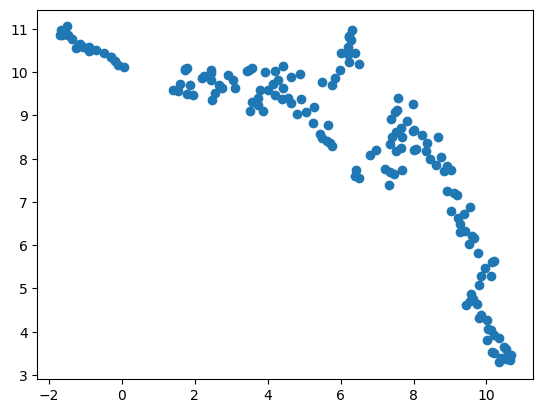

In [7]:
import matplotlib.pyplot as plt
plt.scatter(coords[:, 0], coords[:, 1])

windows.shape

In [8]:
month_ids = np.array([date.month for date in dates])
year_ids = np.array([date.year for date in dates])


stations_map = {int(i):str(stations[i]) for i in range(len(stations))}
months_map = {int(i):str(i) for i in range(1, 13)}
years_map = {int(year) : str(year) for year in year_ids}

In [9]:
mts = TSerie(X=windows, y = station_ids)

if SMOOTH > 0:
    mts.smooth(window_size=SMOOTH)

if MODE == 'shape':
    mts.shapeNormalizization()
else:
    mts.minMaxNormalizization()


Loaded mts - N: 168, T: 365, D: 2 
(168, 2, 365)


In [10]:
from ts2vec import TS2Vec

# Train a TS2Vec model
model = TS2Vec(
    input_dims=mts.D,
    device=0,
    output_dims=128,
)
loss_log = model.fit(
    mts.X,
    verbose=True,   
)

ModuleNotFoundError: No module named 'ts2vec'

In [ ]:
dfeatures = model.encode(mts.X) 
mts.features = model.encode(mts.X, encoding_window='full_series') 


In [ ]:
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
reducer = umap.UMAP(n_components=2)
# reducer = UMAP(n_components=2)
# reducer = UMAP(n_components=2, n_neighbors=10, min_dist=0.1)
# reducer = TSNE(n_components=2, metric='euclidean')

# coords = reducer.fit_transform(mts.features, y =month_ids)
coords = reducer.fit_transform(mts.features)


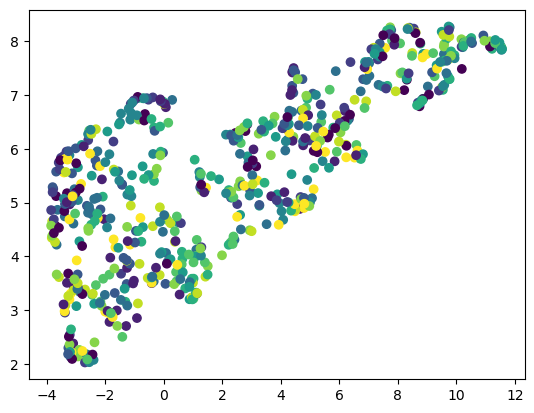

In [ ]:
plt.scatter(coords[:, 0], coords[:, 1], c=month_ids)

In [ ]:
dfeatures.shape

(640, 28, 128)

In [ ]:
# mts.features.min()
from sklearn.decomposition import PCA

tfeatures = np.zeros([mts.N, mts.T])
for i in range(mts.T):
    reducer = PCA(n_components=1)
    tfeatures[:,i] = reducer.fit_transform(dfeatures[:, i, :]).squeeze()


In [ ]:
tfeatures.shape

(640, 28)

In [ ]:

# np.arange(1, mts.T + 1)

# tfeatures[group_ids == years[mts.T - 4]]

In [ ]:
years = np.unique(station_ids)

group_ids = station_ids
fcs = []

for target in years:

    ccpca = CCPCA(n_components=1)
    # target = 2012
    ccpca.fit(
        tfeatures[group_ids==target],
        tfeatures[group_ids!=target],
        var_thres_ratio=0.5,
        n_alphas=40,
        max_log_alpha=0.5,
    )


    coords2 = ccpca.transform(tfeatures[group_ids==target])
    # coords2 = ccpca.transform(dfeatures[year_ids!=2011])
    # coords2 = ccpca.transform(dfeatures)
    best_alpha = ccpca.get_best_alpha()
    cpca_fcs = ccpca.get_feat_contribs()
    fcs.append(cpca_fcs)
    # print(cpca_fcs)
    # print(best_alpha)
    # plt.scatter(coords2[:, 0], coords2[:, 1])
print(len(fcs))
print(fcs[0].shape)


6
(28,)


In [ ]:

# print(fcs[item])
# fcs[item].mean(), fcs[item].max(), fcs[item].min()


1999


<BarContainer object of 28 artists>

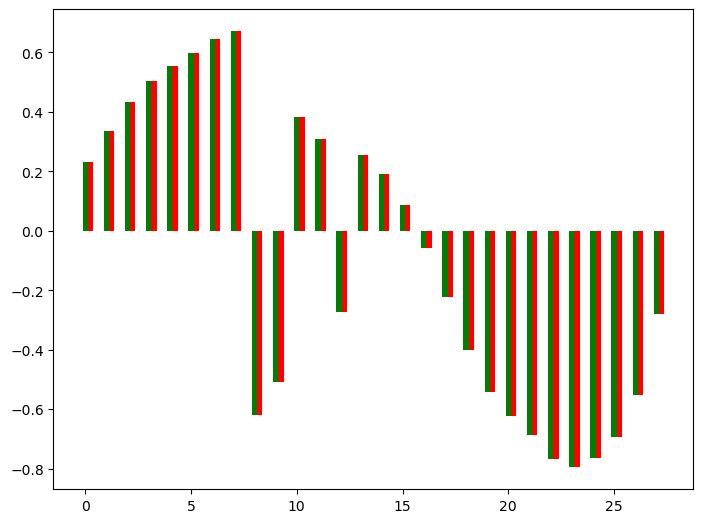

In [ ]:
item1 = 2
item2 = 3
print(year_ids[item2])
fcs = np.array(fcs)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.array([i for i in range (28)])
# for i in range(28):
plt.bar(X + 0.00, fcs[item1], color = 'g', width = 0.25)
ax.bar(X + 0.25, fcs[item2], color = 'r', width = 0.25)
# ax.bar(X + 0.50, fcs[:,2], color = 'r', width = 0.25)
# plt.bar(, fcs[:,0])

In [ ]:
from server.source.storage import MTSStorage

# storage = MTSStorage(os.path.join(VIS_PATH ,'ontario_months.npy'))    
storage = MTSStorage(os.path.join(VIS_PATH ,'ontario_days.npy'))    
# storage.delete()
storage.load()

dimensions = pollutans
data = np.concatenate([mts.X_orig, mts.X], axis=2) 
storage.add_mts(
    '_'.join(POLLUTANTS) , data , 
    dimensions = dimensions + [dim+ '_norm' for dim in dimensions], 
    labels = {'station': station_ids, 'months': month_ids, 'years': year_ids}, 
    labelsNames={'station': stations_map, 'months': months_map, 'years': years_map}, 
    coords = {
        'coords': coords,
    },
    sampling=True,
    n_samples= N_VIZ_SAMPLES
)

storage.save()

mts shape: N: 640 -  T: 28 - D: 2


!pwd